In [44]:
# Import dependencies
from matplotlib import pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

In [45]:
# Load vehicle data set into pandas
df= pd.read_csv('data/clean_car_prices.csv')
df

,year,make,model,trim,body,state,condition,odometer,color,mmr,sellingprice,saledate,saleyear,age,pct_mmr,age_when_sold,Make-Model,price_change
0,2015,kia,sorento,lx,suv,ca,5.0,16639.0,white,20500.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),2014,-1,1.048780,-1,kia-sorento,NaN
1,2015,kia,sorento,lx,suv,ca,5.0,9393.0,white,20800.0,21500.0,Tue Dec 16 2014 12:30:00 GMT-0800 (PST),2014,-1,1.033654,-1,kia-sorento,0.0
2,2014,bmw,3 series,328i sulev,sedan,ca,45.0,1331.0,gray,31900.0,30000.0,Thu Jan 15 2015 04:30:00 GMT-0800 (PST),2015,1,0.940439,1,bmw-3 series,NaN
3,2015,volvo,s60,t5,sedan,ca,41.0,14282.0,white,27500.0,27750.0,Thu Jan 29 2015 04:30:00 GMT-0800 (PST),2015,0,1.009091,0,volvo-s60,NaN
4,2014,bmw,6 series gran coupe,650i,sedan,ca,43.0,2641.0,gray,66000.0,67000.0,Thu Dec 18 2014 12:30:00 GMT-0800 (PST),2014,0,1.015152,0,bmw-6 series gran coupe,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
558700,2015,kia,k900,luxury,sedan,in,45.0,18255.0,silver,35300.0,33000.0,Thu Jul 09 2015 07:00:00 GMT-0700 (PDT),2015,0,0.934844,0,kia-k900,-1400.0
558701,2012,ram,2500,power wagon,crew cab,wa,5.0,54393.0,white,30200.0,30800.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT),2015,3,1.019868,3,ram-2500,-5200.0
558702,2012,bmw,x5,xdrive35d,suv,ca,48.0,50561.0,black,29800.0,34000.0,Wed Jul 08 2015 09:30:00 GMT-0700 (PDT),2015,3,1.140940,3,bmw-x5,20000.0
558703,2015,nissan,altima,2.5 s,sedan,ga,38.0,16658.0,white,15100.0,11100.0,Thu Jul 09 2015 06:45:00 GMT-0700 (PDT),2015,0,0.735099,0,nissan-altima,1100.0


In [46]:
# Convert 'saledate' column to string
df[['saledate']] = df[['saledate']].astype(str)

# Apply string operations to remove 'GMT', strip whitespaces, and convert to datetime objects
df['saledate'] = pd.to_datetime(df['saledate'].str.split('GMT').str[0].str.strip(), errors='coerce').dt.date

# Create a new DataFrame 'selling_date_price' with only 'saledate' and 'sellingprice' columns
selling_date_price = df[['Make-Model','saledate', 'sellingprice']].copy()

# Display the new DataFrame containing 'saledate' and 'sellingprice'
selling_date_price.head()

,Make-Model,saledate,sellingprice
0,kia-sorento,2014-12-16,21500.0
1,kia-sorento,2014-12-16,21500.0
2,bmw-3 series,2015-01-15,30000.0
3,volvo-s60,2015-01-29,27750.0
4,bmw-6 series gran coupe,2014-12-18,67000.0


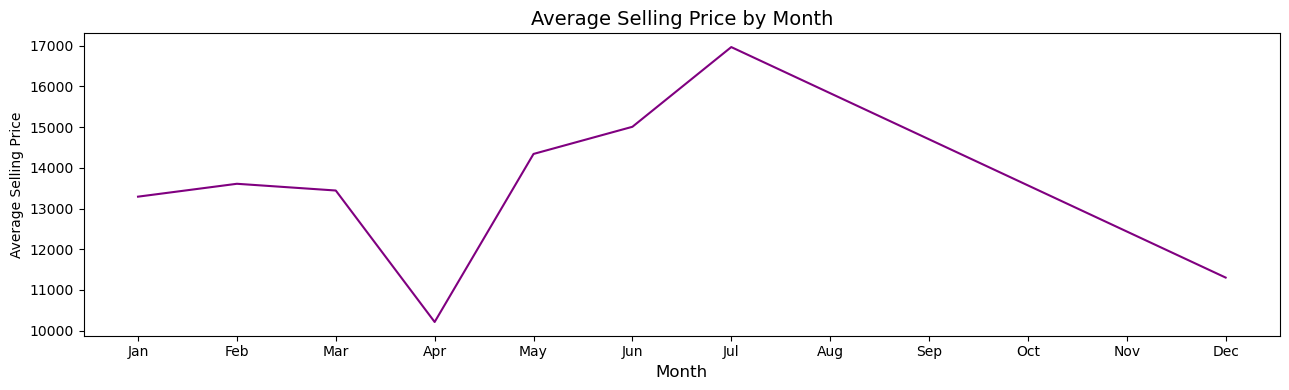

In [47]:
# Convert 'saledate' column to datetime format
df['saledate'] = pd.to_datetime(df['saledate'])

# Extract month from 'saledate'
df['month'] = df['saledate'].dt.month

# Group data by month and calculate average selling price
average_price_by_month = df.groupby('month')['sellingprice'].mean()

# Plot the average selling price by month
plt.figure(figsize=(13, 4))
average_price_by_month.plot(color='purple')
plt.title('Average Selling Price by Month', fontsize=14)
plt.xlabel('Month', fontsize=12)
plt.ylabel('Average Selling Price')
plt.xticks(range(1, 13), ['Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec'])
plt.tight_layout()
plt.show()

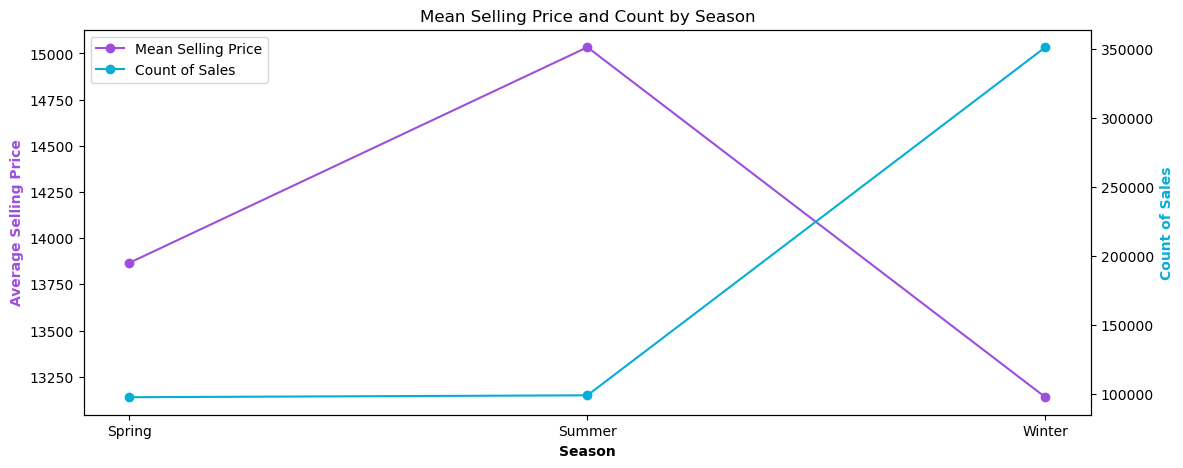

In [48]:
def get_season(month):
    if month in [12, 1, 2]:
        return 'Winter'
    elif month in [3, 4, 5]:
        return 'Spring'
    elif month in [6, 7, 8]:
        return 'Summer'
    else:
        return 'Fall'

# Assuming 'saledate' is a datetime column in your DataFrame
df['Season'] = df['saledate'].dt.month.map(get_season)

# Group the data by season and aggregate
grouped = df.groupby('Season').agg({'sellingprice':'mean', 'Make-Model':'count'}).reset_index()

# Create subplots
fig, ax1 = plt.subplots(figsize=(13, 5))

# Plot average selling price over time
ax1.plot(grouped['Season'], grouped['sellingprice'], marker='o', color='#9d4edd', label='Mean Selling Price')
ax1.set_xlabel('Season', fontweight='bold')
ax1.set_ylabel('Average Selling Price', fontweight='bold', color='#9d4edd')

# Create a secondary y-axis for count
ax2 = ax1.twinx()
ax2.plot(grouped['Season'], grouped['Make-Model'], marker='o', color='#06aed5', label='Count of Sales')
ax2.set_ylabel('Count of Sales', fontweight='bold', color='#06aed5')

# Add legend
lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

plt.title('Mean Selling Price and Count by Season')
plt.show()